In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from PIL import Image

In [2]:
rf = np.load('./im/npy/rfAveAnnual.npy')

In [3]:
print(rf.shape, '\t', rf.dtype)

(23, 1800, 3600) 	 float32


In [13]:
lt = []
for i in rf:
    lt.append(np.average(i, axis = 1))
lt = np.array(lt)

In [14]:
print(lt.shape, '\t', lt.dtype)

(23, 1800) 	 float32


In [15]:
gl = lt[:, 300:1499]

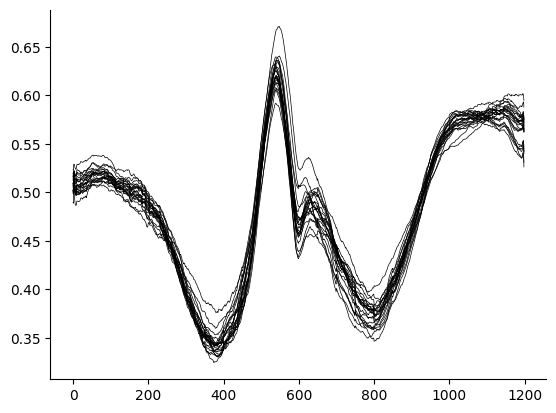

In [37]:
x = range(0, len(gl[0]))
for i in gl:
    plt.plot(x, i, color = 'black', lw = 0.5)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig("im/monthlyProfile.png", format="png", dpi=600) 

In [19]:
gm = np.average(gl, axis = 1)
print(gm.shape, '\t', gm.dtype)

(23,) 	 float32


In [24]:
x = range(0, len(gm))

print(np.corrcoef(x, gm)[0][1])

0.08759549675177494


In [30]:
r1 = np.polyfit(x, gm, 1)
f1 = np.poly1d(r1)(x) 

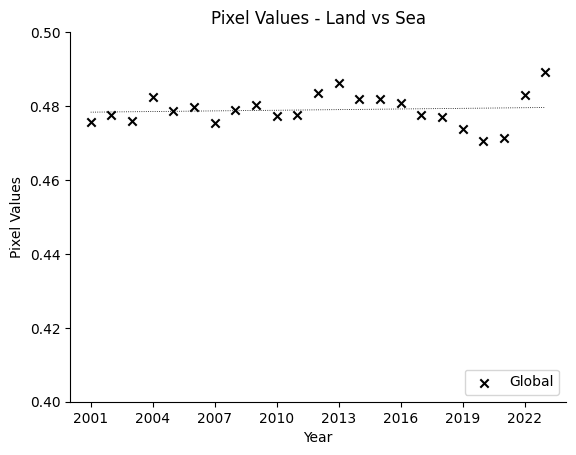

In [35]:
x = range(2001, 2001 + len(gm))

plt.scatter(x, gm, label = 'Global', color = "black", marker = 'x')
plt.plot(x, f1, lw = 0.6, color = 'black', ls = ':')
plt.title('Pixel Values - Land vs Sea')
plt.xlabel('Year') 
plt.ylabel('Pixel Values')
plt.xlim(2000, 2024)
plt.ylim(.4, .5)
plt.legend(loc = "lower right")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer = True))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig("im/timeCoursesAnnual.png", format="png", dpi=600) 